In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn

In [5]:
df = pd.read_csv("all_train.csv")

In [6]:
df

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.000000
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.000000
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.000000
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.000000
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.0,1.617264,-0.537084,-1.275867,0.650799,-1.511621,0.850488,0.596391,-0.054678,0.728849,...,0.664328,-0.960709,-0.894011,1.743123,-0.426198,-0.324286,-0.432739,1.340297,0.267774,750.000000
6999996,0.0,-0.511357,0.270927,0.085989,-0.243802,-1.035668,-0.005984,-0.127219,0.721426,1.404479,...,-1.015462,1.367217,-1.053815,-0.573682,-1.907798,0.194661,-0.190621,0.027776,-0.316018,1250.000000
6999997,1.0,0.062408,-0.987203,0.570667,1.517195,0.639548,-1.054221,1.115239,1.261928,-1.009308,...,0.790842,0.892545,-0.192816,-0.573682,0.973622,1.034964,-0.340661,-0.181193,1.877042,1500.000000
6999998,1.0,1.659131,1.096223,0.562821,1.627193,0.767236,-1.054221,1.079999,0.155488,-1.412207,...,-0.671423,-0.308908,-0.568336,-0.573682,1.043119,1.270350,0.217405,0.120213,1.073020,1500.000000


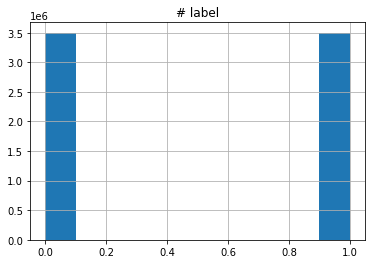

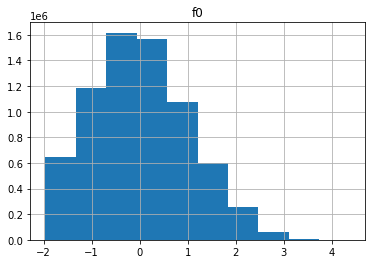

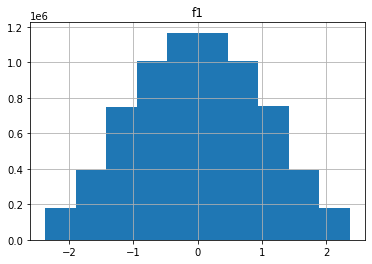

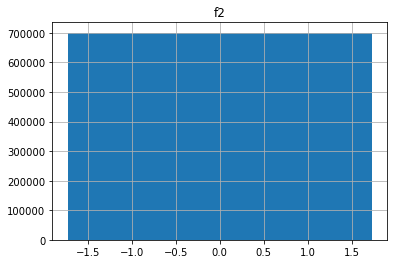

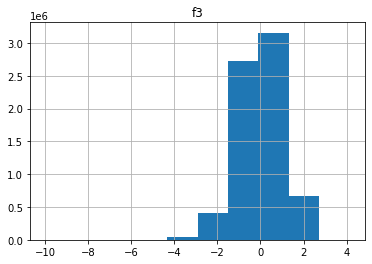

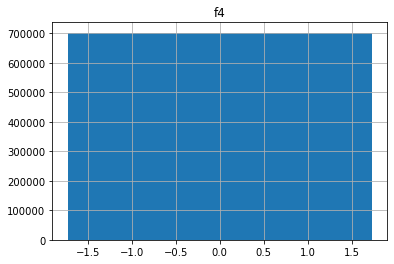

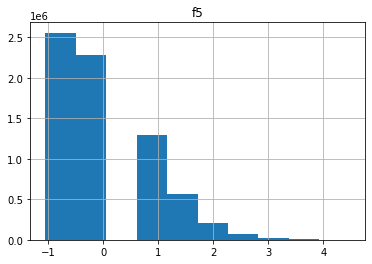

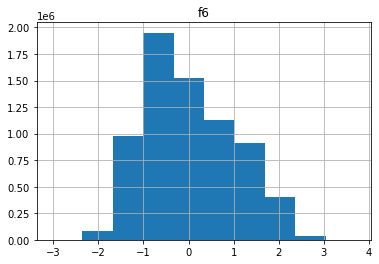

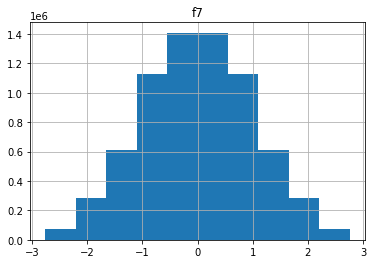

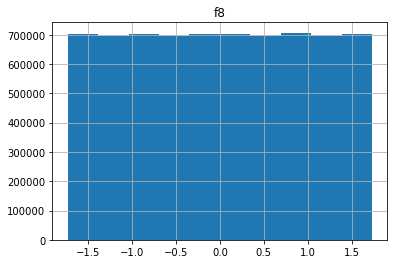

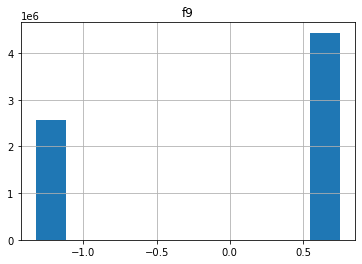

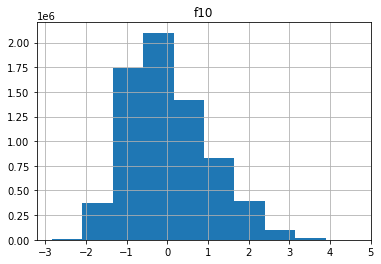

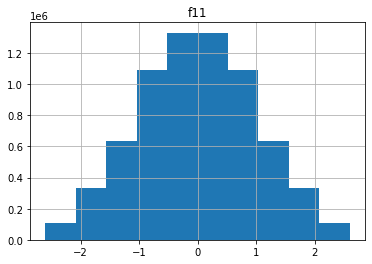

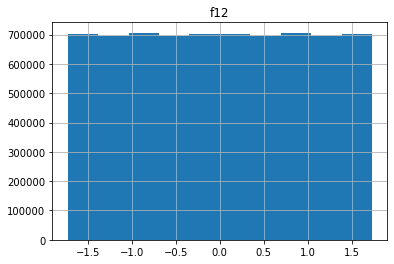

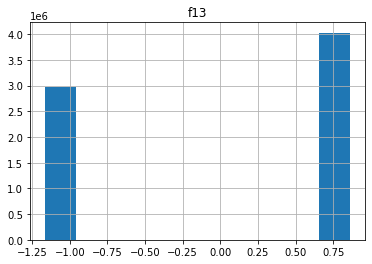

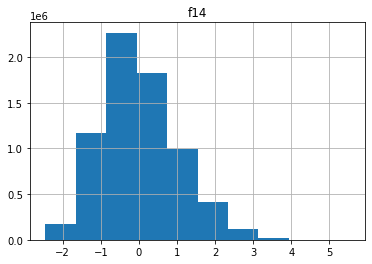

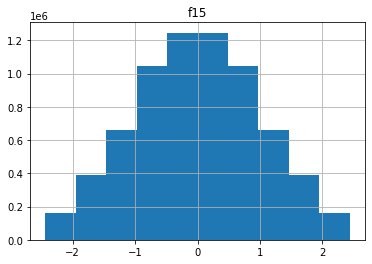

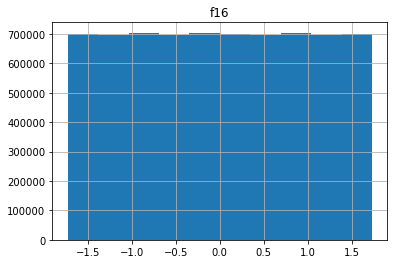

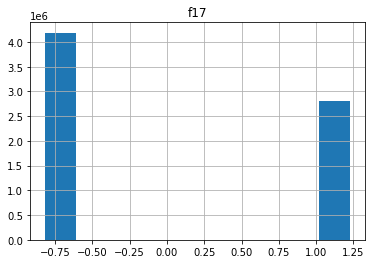

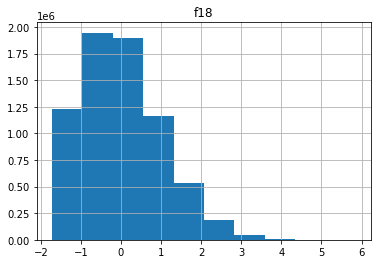

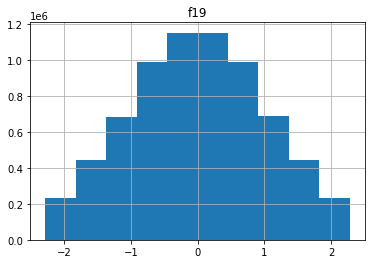

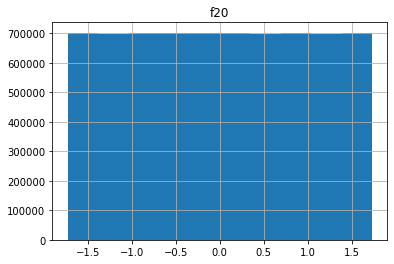

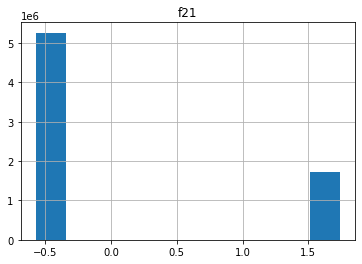

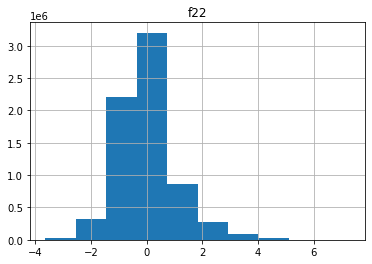

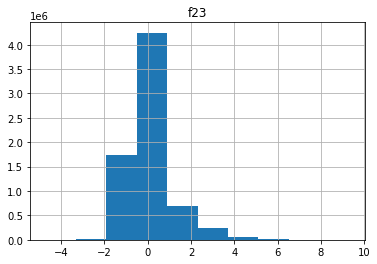

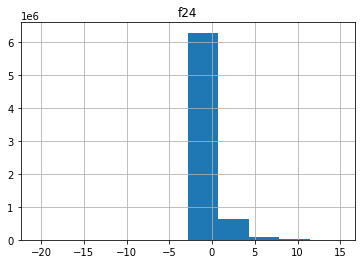

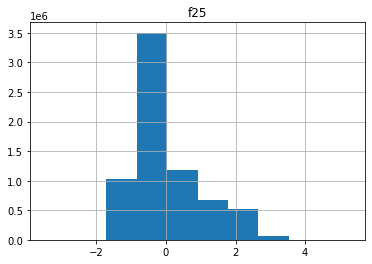

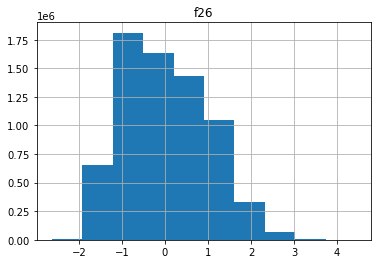

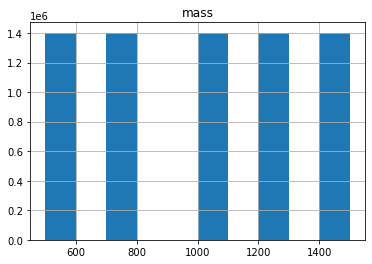

In [7]:
for i in df:
    df[i].hist()
    plt.title(i)
    plt.show()

In [8]:
df.rename(columns={ df.columns[0]: "label" }, inplace = True)
df.head()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [9]:
X = df.drop(["label"], axis=1)
y = df["label"].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

In [27]:
import tensorflow as tf
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(256, activation='elu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(128, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])



In [28]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=7)

In [30]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=5000, callbacks=[es])

Epoch 1/10


2022-07-23 15:25:17.994084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1118/1120 [============================>.] - ETA: 0s - loss: 0.3494 - accuracy: 0.8330

2022-07-23 15:25:35.006693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 19s 16ms/step - loss: 0.3494 - accuracy: 0.8330 - val_loss: 0.3069 - val_accuracy: 0.8573
Epoch 2/10
1120/1120 [==============================] - 19s 17ms/step - loss: 0.2990 - accuracy: 0.8632 - val_loss: 0.2924 - val_accuracy: 0.8664
Epoch 3/10
1120/1120 [==============================] - 19s 17ms/step - loss: 0.2947 - accuracy: 0.8657 - val_loss: 0.3117 - val_accuracy: 0.8564
Epoch 4/10
1120/1120 [==============================] - 19s 17ms/step - loss: 0.2930 - accuracy: 0.8666 - val_loss: 0.2906 - val_accuracy: 0.8677
Epoch 5/10
1120/1120 [==============================] - 19s 17ms/step - loss: 0.2915 - accuracy: 0.8675 - val_loss: 0.2881 - val_accuracy: 0.8692
Epoch 6/10
1120/1120 [==============================] - 19s 17ms/step - loss: 0.2911 - accuracy: 0.8676 - val_loss: 0.2937 - val_accuracy: 0.8655
Epoch 7/10
1120/1120 [==============================] - 19s 17ms/step - loss: 0.2903 - accuracy: 0.8681 - val_loss: 0.2883 - val_accura

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

In [31]:
import tensorflow as tf
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(256, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(256, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])



In [32]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=7)

In [34]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=2000, callbacks=[es])

Epoch 1/10


2022-07-23 15:30:28.348705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2800/2800 [==============================] - ETA: 0s - loss: 0.3275 - accuracy: 0.8468

2022-07-23 15:30:50.892474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2800/2800 [==============================] - 25s 9ms/step - loss: 0.3275 - accuracy: 0.8468 - val_loss: 0.2988 - val_accuracy: 0.8626
Epoch 2/10
2800/2800 [==============================] - 24s 9ms/step - loss: 0.2996 - accuracy: 0.8630 - val_loss: 0.2991 - val_accuracy: 0.8640
Epoch 3/10
2800/2800 [==============================] - 24s 8ms/step - loss: 0.2948 - accuracy: 0.8658 - val_loss: 0.2954 - val_accuracy: 0.8659
Epoch 4/10
2800/2800 [==============================] - 24s 8ms/step - loss: 0.2930 - accuracy: 0.8665 - val_loss: 0.2924 - val_accuracy: 0.8671
Epoch 5/10
2800/2800 [==============================] - 24s 9ms/step - loss: 0.2911 - accuracy: 0.8678 - val_loss: 0.2934 - val_accuracy: 0.8665
Epoch 6/10
2800/2800 [==============================] - 24s 9ms/step - loss: 0.2907 - accuracy: 0.8681 - val_loss: 0.3027 - val_accuracy: 0.8632
Epoch 7/10
2800/2800 [==============================] - 24s 9ms/step - loss: 0.2899 - accuracy: 0.8683 - val_loss: 0.2865 - val_accuracy: 0.8

In [47]:
import tensorflow as tf
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])



In [48]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=7)

In [50]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=2500, callbacks=[es])

Epoch 1/10


2022-07-23 15:52:45.065252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2233/2240 [============================>.] - ETA: 0s - loss: 0.3288 - accuracy: 0.8410

2022-07-23 15:53:00.099458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2240/2240 [==============================] - 17s 7ms/step - loss: 0.3287 - accuracy: 0.8410 - val_loss: 0.3049 - val_accuracy: 0.8586
Epoch 2/10
2240/2240 [==============================] - 16s 7ms/step - loss: 0.2962 - accuracy: 0.8627 - val_loss: 0.2905 - val_accuracy: 0.8656
Epoch 3/10
2240/2240 [==============================] - 16s 7ms/step - loss: 0.2927 - accuracy: 0.8649 - val_loss: 0.2905 - val_accuracy: 0.8660
Epoch 4/10
2240/2240 [==============================] - 16s 7ms/step - loss: 0.2907 - accuracy: 0.8663 - val_loss: 0.2876 - val_accuracy: 0.8677
Epoch 5/10
2240/2240 [==============================] - 16s 7ms/step - loss: 0.2894 - accuracy: 0.8671 - val_loss: 0.3001 - val_accuracy: 0.8626
Epoch 6/10
2240/2240 [==============================] - 16s 7ms/step - loss: 0.2887 - accuracy: 0.8676 - val_loss: 0.2872 - val_accuracy: 0.8672
Epoch 7/10
2240/2240 [==============================] - 16s 7ms/step - loss: 0.2885 - accuracy: 0.8676 - val_loss: 0.2927 - val_accuracy: 0.8